In [69]:
import seaborn as sns
import pandas as pd
import numpy as np

In [70]:
df=sns.load_dataset('iris')

In [71]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
encoder=LabelEncoder()

In [74]:
df['species']=encoder.fit_transform(df['species'])

In [75]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [76]:
# removing 0 which is setosa and jsepal_length and petal_witdth
df=df[df['species']!=0][['sepal_width','petal_length','species']]

In [77]:
df.shape

(100, 3)

In [78]:
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [79]:
import matplotlib.pyplot as plt

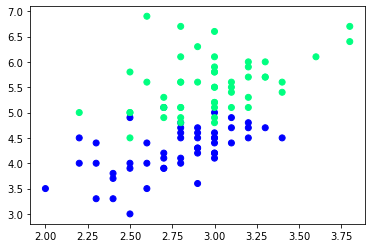

In [80]:
plt.scatter(df['sepal_width'],df['petal_length'], c=df['species'], cmap='winter')

In [81]:
df.sample(100)

,sepal_width,petal_length,species
107,2.9,6.3,2
66,3.0,4.5,1
75,3.0,4.4,1
68,2.2,4.5,1
129,3.0,5.8,2
...,...,...,...
88,3.0,4.1,1
143,3.2,5.9,2
87,2.3,4.4,1
50,3.2,4.7,1


In [82]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [83]:
df_train

,sepal_width,petal_length,species
55,2.8,4.5,1
66,3.0,4.5,1
100,3.3,6.0,2
82,2.7,3.9,1
125,3.2,6.0,2
105,3.0,6.6,2
58,2.9,4.6,1
99,2.8,4.1,1
110,3.2,5.1,2
96,2.9,4.2,1


In [84]:
df_val

,sepal_width,petal_length,species
51,3.2,4.5,1
106,2.5,4.5,2
69,2.5,3.9,1
138,3.0,4.8,2
97,2.9,4.3,1


In [85]:
df_test

,sepal_width,petal_length,species
123,2.7,4.9,2
60,2.0,3.5,1
95,3.0,4.2,1
102,3.0,5.9,2
98,2.5,3.0,1


In [86]:
x_test=df_val.iloc[:,:-1].values
y_test=df_val.iloc[:,-1:].values

In [87]:
x_test

array([[3.2, 4.5],
       [2.5, 4.5],
       [2.5, 3.9],
       [3. , 4.8],
       [2.9, 4.3]])

In [88]:
y_test

array([[1],
       [2],
       [1],
       [2],
       [1]])

# bagging

In [89]:
df_bag=df_train.sample(8, replace=True)
x=df_bag.iloc[:,:-1]
y=df_bag.iloc[:,-1:]

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [91]:
df_bag1=DecisionTreeClassifier()

In [92]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plt.figure(figsize=(15,10))
    plot_tree(clf, filled=True)
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

0.8


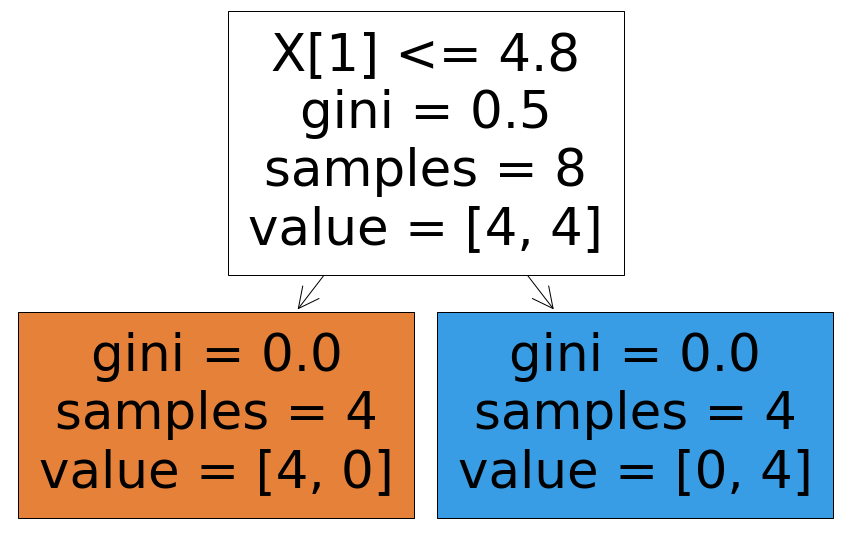

In [93]:
evaluate(df_bag1,x,y)

0.8


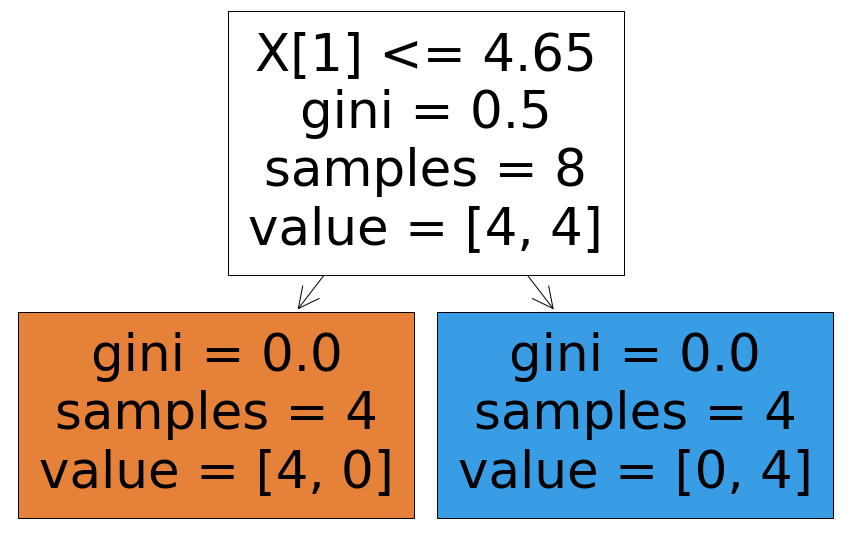

In [94]:
df_bag=df_train.sample(8, replace=True)
x=df_bag.iloc[:,:-1]
y=df_bag.iloc[:,-1:]
df_bag2=DecisionTreeClassifier()
evaluate(df_bag2,x,y)

0.4


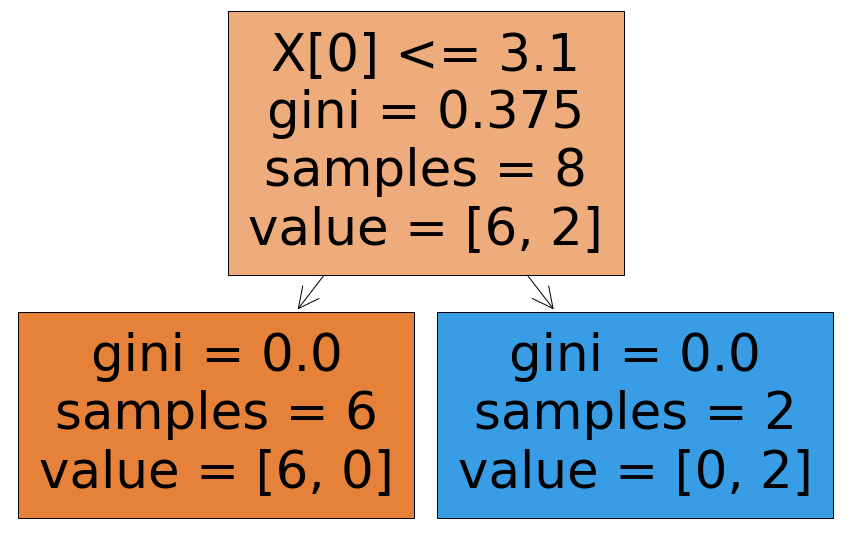

In [95]:
df_bag=df_train.sample(8, replace=True)
x=df_bag.iloc[:,:-1]
y=df_bag.iloc[:,-1:]
df_bag3=DecisionTreeClassifier()
evaluate(df_bag3,x,y)

0.6


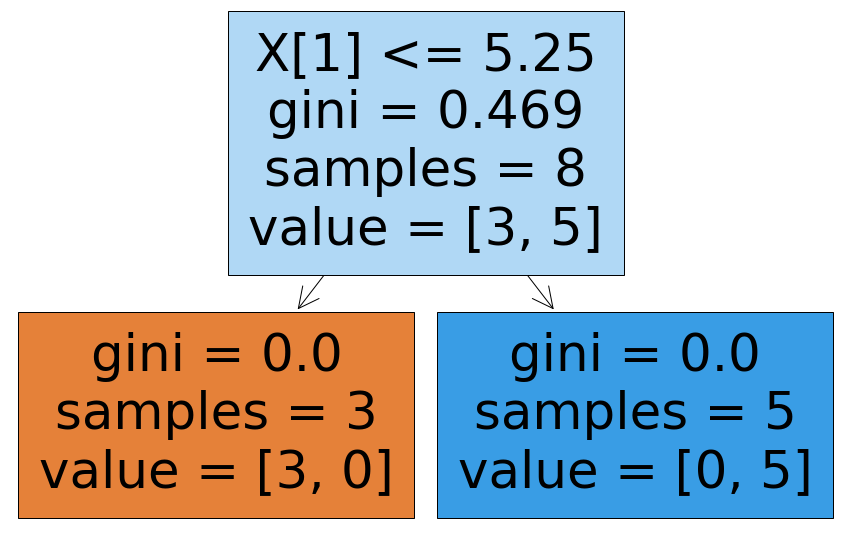

In [96]:
df_bag=df_train.sample(8, replace=True)
x=df_bag.iloc[:,:-1]
y=df_bag.iloc[:,-1:]
df_bag4=DecisionTreeClassifier()
evaluate(df_bag4,x,y)

0.8


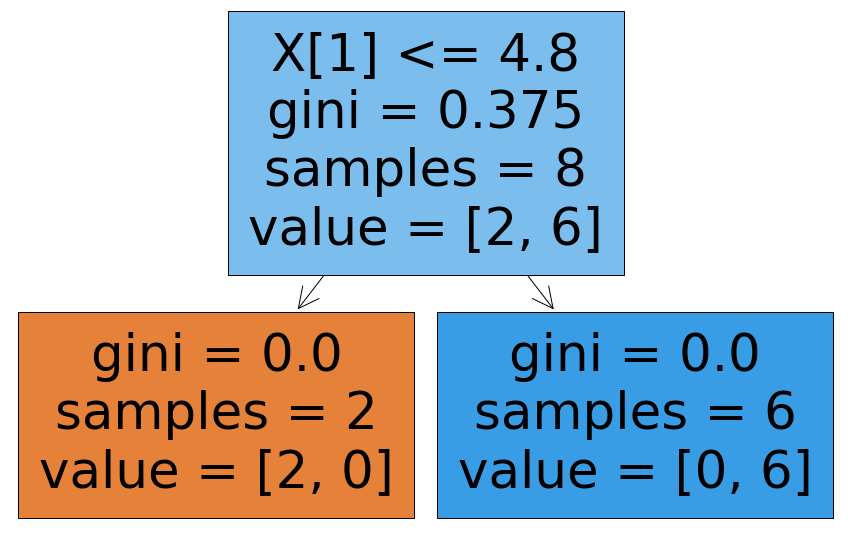

In [97]:
df_bag=df_train.sample(8, replace=True)
x=df_bag.iloc[:,:-1]
y=df_bag.iloc[:,-1:]
df_bag5=DecisionTreeClassifier()
evaluate(df_bag5,x,y)

# Predict

In [98]:
df_test

,sepal_width,petal_length,species
123,2.7,4.9,2
60,2.0,3.5,1
95,3.0,4.2,1
102,3.0,5.9,2
98,2.5,3.0,1


In [100]:
print("prediction1", df_bag1.predict(np.array([3.0,5.9]).reshape(1,2)))
print("prediction2", df_bag2.predict(np.array([3.0,5.9]).reshape(1,2)))
print("prediction3", df_bag3.predict(np.array([3.0,5.9]).reshape(1,2)))
print("prediction4", df_bag4.predict(np.array([3.0,5.9]).reshape(1,2)))
print("prediction5", df_bag5.predict(np.array([3.0,5.9]).reshape(1,2)))

prediction1 [2]
prediction2 [2]
prediction3 [1]
prediction4 [2]
prediction5 [2]


# New random forest model

In [149]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [150]:
x,y=make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [151]:
df=pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.265859,-1.738756,-0.030569,-1.719965,-3.854663,0
1,-0.968890,-0.014938,0.922510,0.168516,1.484421,1
2,-0.087893,5.913682,-4.316625,4.011720,-0.250024,0
3,-1.396593,-1.619865,1.936392,-1.082099,0.751332,1
4,-0.687524,0.709672,2.206382,0.734573,3.124068,1


In [152]:
 # function for random sampling of rows
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [153]:
 # function for random sampling of columns
def sample_features(df,percent):
    return df.sample(int(percent*df.shape[1]), replace=True, axis=1)

In [154]:
# function for combined sampling
def combined_sampling(df,row_percent, col_percent):
    new_df=sample_rows(df,row_percent)
    return sample_featues(new_df,col_percent)

In [155]:
df1=sample_rows(df,0.2)
df1

,col1,col2,col3,col4,col5,target
38,-1.067314,1.535643,1.144249,1.053855,1.296397,1
52,0.531308,2.695185,-3.396792,0.511780,0.334711,0
97,0.474092,2.268998,-2.344742,0.462112,-0.389221,0
81,-0.619885,1.608908,1.011507,1.800366,-0.150834,1
58,0.968368,0.418830,-0.712202,-0.164825,-1.326829,0
54,0.891898,2.703730,-3.791791,0.806202,-2.355629,0
33,1.028193,-0.044248,-0.273918,1.330820,-1.967290,0
82,-3.126461,0.765616,2.181748,-0.402535,-0.616383,1
1,-0.968890,-0.014938,0.922510,0.168516,1.484421,1
98,-0.091052,2.046109,-3.133905,-0.602916,-2.042427,0


In [156]:
df2=sample_rows(df,0.2)

In [157]:
df3=sample_rows(df,0.2)

In [158]:
# making decision tree classifier for these three datasets

In [159]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [160]:
df1.iloc[:,:5]

,col1,col2,col3,col4,col5
38,-1.067314,1.535643,1.144249,1.053855,1.296397
52,0.531308,2.695185,-3.396792,0.511780,0.334711
97,0.474092,2.268998,-2.344742,0.462112,-0.389221
81,-0.619885,1.608908,1.011507,1.800366,-0.150834
58,0.968368,0.418830,-0.712202,-0.164825,-1.326829
54,0.891898,2.703730,-3.791791,0.806202,-2.355629
33,1.028193,-0.044248,-0.273918,1.330820,-1.967290
82,-3.126461,0.765616,2.181748,-0.402535,-0.616383
1,-0.968890,-0.014938,0.922510,0.168516,1.484421
98,-0.091052,2.046109,-3.133905,-0.602916,-2.042427


In [161]:
clf1.fit(df1.iloc[:,:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [162]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[0] <= -0.355\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

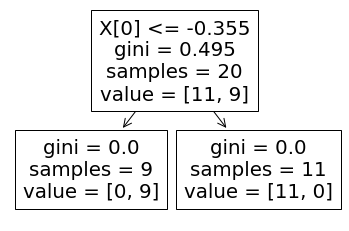

In [163]:
plot_tree(clf1)

[Text(0.4, 0.9, 'X[0] <= 0.016\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.7, 'X[3] <= 3.932\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.4, 0.5, 'X[0] <= 1.769\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6, 0.3, 'X[4] <= -1.114\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

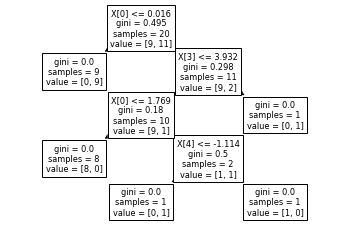

In [164]:
plot_tree(clf2)

[Text(0.6, 0.875, 'X[4] <= 0.025\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.625, 'X[0] <= -0.797\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.375, 'X[0] <= 1.624\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

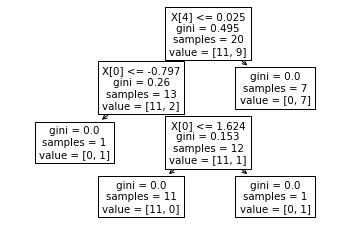

In [165]:
plot_tree(clf3)